In [ ]:
#sp500_tm.csv에 대해 분류 모형
#direction가 target
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

df = pd.read_csv("sp500_tm.csv")
y = df.Direction
X = df.drop("Direction", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = XGBClassifier().fit( X_train, y_train)
model.score(X_test, y_test)
print( classification_report( y_test, model.predict( X_test)))

In [8]:
#pm_train.csv에 대해 분류 모형
df = pd.read_csv("pm_train.csv", index_col=0)
df.drop(["id", "cycle"], axis=1, inplace=True)

In [12]:
def func1(x):
  if x < 30:
    return 1
  else :
    return 0
df["target"] = df.ttf.apply( func1 )   #target으로...
df.target.value_counts()
df.drop("ttf", axis=1, inplace=True)

y = df.target
X = df.drop("target", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = XGBClassifier().fit( X_train, y_train)
model.score(X_test, y_test)
print( classification_report( y_test, model.predict( X_test)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4385
           1       0.88      0.84      0.86       773

    accuracy                           0.96      5158
   macro avg       0.93      0.91      0.92      5158
weighted avg       0.96      0.96      0.96      5158



### Uplift Modeling
- 특정 처리(treatment) (예: 마케팅 제안)를 받을 경우 구매 가능성이 높아지는 고객을 식별하는 데 기여
- targeted by treatment   VS not targeted by trmt.
   - 구매 가능성의 차이를 분석
   - 비용 집약적인 마케팅 캠페인에서 특히 유용

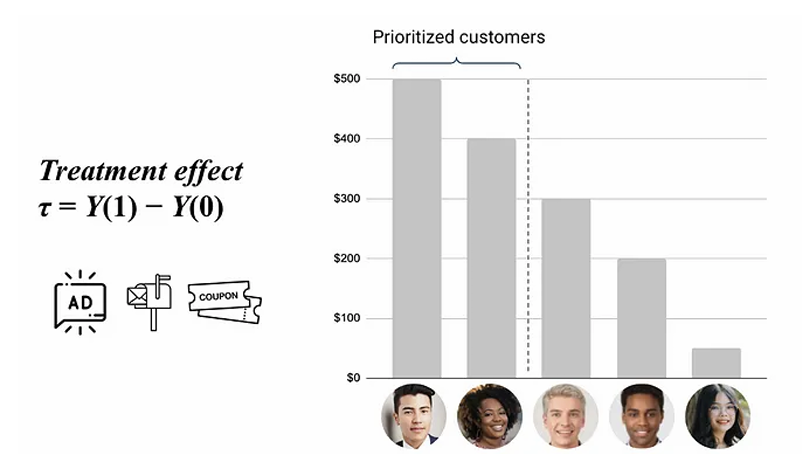

- 네 가지 유형의 타겟
1. Persuadables: trement를 받은 경우 구매할 가능성이 높은 대상, 업리프트 모델링의 주요 그룹
2. Sure Things: treatment와 상관없이 구매할 그룹
3. Lost Causes: treatment를 받아 target되어도 구매하지 않는 그룹
4. Sleeping Dogs: treatment를 받으면 덜 구매할 그룹

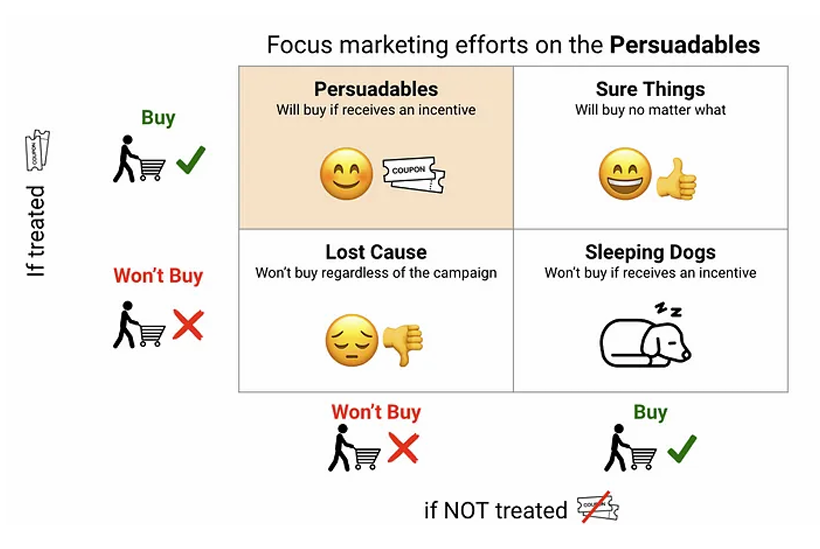

### 업리프트 모델링의 두 가지 접근법
1. Meta-Learners: customer를 추정된 treatment effect로 정렬(내림차순)하여 target대상을 발견함

2. Tree-Based Methods: Decision Tree를 사용하여 업리프트 모델링
 - Uplift Trees, Uplift Random Forests
 - 장점: multiple treatment groups을 동시에 처리, 예를 들어, 할인율 하나를 분석하는 대신, 여러 할인율( 5%, 10%,  20% )을 동시에 비교

### Tree-based methods

- 기존 DT와의 비교
 - DT: 각 customer가 물건을 구매할 것인지를 예측
 - uplift tree: "어느 그룹에 target해서 쿠폰을 줘야 하는지?"에 대한 답변, treated와 untreated 고객들을 구분하여, 잠재적인 uplift를 찾고자 함

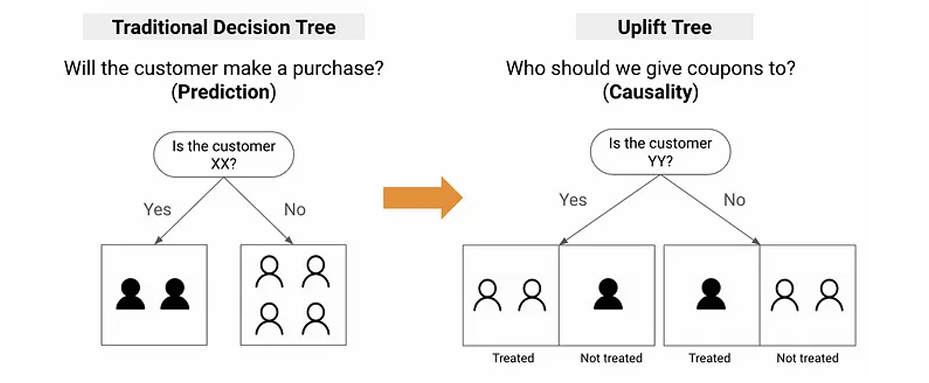

- 기존 DT: Impurity 등을 활용하여 split rule을 선택

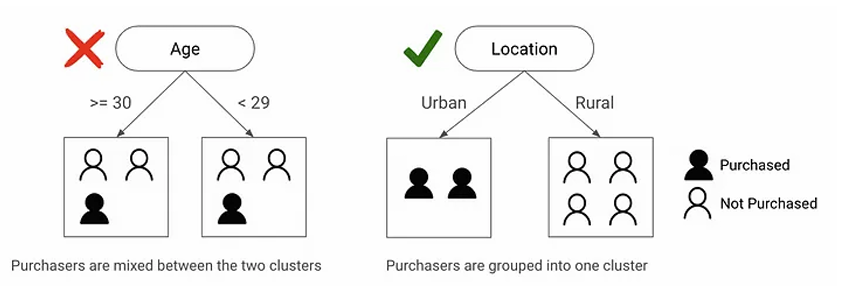

- uplift tree: “Who should we give coupons to?” 에 대한 답변을 찾으려고 함.
 - 목적: 쿠폰 등 trmt를 받은 그룹과 받지 않은 그룹간의 구매율을 최대한 구분
 - treated 그룹과 아닌 그룹을 나눠서 분석
 - 아래 두 uplift tree의 예: 우측이 더 나은 split

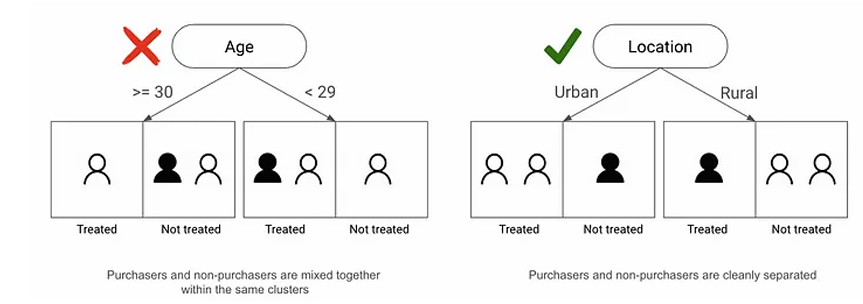

- split criteria는 어떻게?
 - divergence metrics 유형을 사용: Kullback
Leibler (KL) Divergence, 또는 Euclidean Distance
 - 예를 들어, Squared Euclidean Distance를 사용
 - Squared Euclidean Distance = (P(0) — Q(0))² + P(1) — Q(1))²
 -  P(1)과 P(0): treatment 그룹에서의 구매확율 및 구매하지 않을 확률
 -  Q(1)과 Q(0): treatment를 받지 않은 control 그룹에서 구매 확률과 구매하지 않을 확률

 - 좌측 uplift tree의 divergence

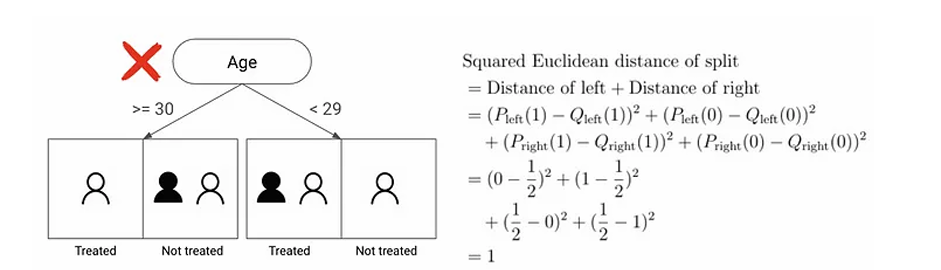

 - 우측 uplift tree의 divergence

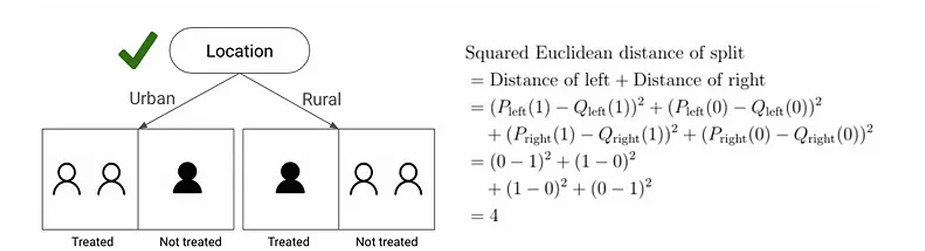

- CausalML 활용: 마케팅 예제 데이터

 - Criteo dataset: 약 1300만 샘플 by Criteo AI Lab.
 - Features Description:
 - f0 to f11: Feature values (dense, float)
 - treatment: Treatment group (1 = treated, 0 = control)
 - conversion: 컨버전 발생 여부 (binary, label)
 - visit: 방문 발생 여부 (binary, label)
 - exposure: Treatment 노출 여부 (binary)
 - 아래 예에서는 treatment와 conversion을 사용

- Source: “A Large Scale Benchmark for Uplift Modeling”
 - Eustache Diemert, Artem Betlei, Christophe Renaudin; (Criteo AI Lab), Massih-Reza Amini (LIG, Grenoble INP)
 - https://ailab.criteo.com/criteo-uplift-prediction-dataset

In [ ]:
! pip install causalml scikit-uplift

In [ ]:
 # Import necessary libraries
import numpy as np
import pandas as pd
from causalml.inference.tree import UpliftRandomForestClassifier
from causalml.metrics import plot_gain, plot_qini
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import importlib
from IPython.display import display
 # Ensure the required libraries are installed
print(importlib.metadata.version('causalml'))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
ERROR:duecredit:Failed to import duecredit due to No module named 'duecredit'


0.15.2


In [ ]:
from sklift.datasets import fetch_criteo
X, y, treatment = fetch_criteo(target_col='conversion', treatment_col='treatment', percent10=True,  return_X_y_t=True)
df = X.copy()
df['conversion'] = y.astype('int64')
df['treatment'] = treatment.astype('object').replace({0: 'control', 1: 'treatment'})
df.head()
# df['user_id'] = df.index

Criteo dataset (10 percent):   0%|          | 0.00/32.0M [00:00<?, ?iB/s]

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,conversion,treatment
0,26.290533,10.059654,8.214383,4.679882,10.280525,4.115453,-1.288207,4.833815,3.971858,13.190056,5.300375,-0.168679,0,treatment
1,12.616365,10.059654,8.339021,4.679882,10.280525,4.115453,0.294443,4.833815,3.869313,32.101873,5.300375,-0.168679,0,control
2,17.293231,10.059654,8.214383,2.293959,10.280525,4.115453,-4.595460,4.833815,3.971858,13.190056,5.300375,-0.168679,0,treatment
3,12.616365,10.059654,8.788121,4.679882,10.280525,4.115453,0.294443,4.833815,3.943716,13.190056,5.300375,-0.168679,0,control
4,20.363292,10.059654,8.563419,2.934780,10.280525,4.115453,-12.570178,4.833815,3.863287,18.380112,5.300375,-0.168679,0,treatment


-  imbalance data set: 약 85%가 광고에 노출 (treated), 15% 는 노출되지 않음 (control group)

In [ ]:
print('Total number of samples: {}'.format(len(df)))

Total number of samples: 1397960


In [ ]:
df['treatment'].value_counts(normalize = True)

,proportion
treatment,
treatment,0.850001
control,0.149999


In [ ]:
df['conversion'].value_counts(normalize = True)

,proportion
conversion,
0,0.997084
1,0.002916


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test, treatment_train, treatment_test = train_test_split(
df.drop(columns = ['conversion', 'treatment']), df['conversion'], df['treatment'],
test_size=0.3, random_state=42)

In [ ]:
# Train Uplift Random Forest model
uplift_rf = UpliftRandomForestClassifier(control_name='control')
uplift_rf.fit(X_train.values, treatment=treatment_train.values, y=y_train.values)

In [ ]:
# Predict uplift using the trained model
y_pred = uplift_rf.predict(X_test)

In [ ]:
from causalml.inference.tree import uplift_tree_string, uplift_tree_plot

# Specify a tree in the random forest (the index can be any integer from 0 to n_estimators-1)
uplift_tree = uplift_rf.uplift_forest[0]

# Print uplift tree as a string
result = uplift_tree_string(uplift_tree.fitted_uplift_tree, X_train.columns)

f2treatment_group_key >= 9.003966261889198?
yes -> f3treatment_group_key >= 4.679881620097285?
		yes -> f8treatment_group_key >= 3.8763913563138233?
				yes -> f2treatment_group_key >= 9.006003477342313?
						yes -> [0.0, 9.157509157509158e-05]
						no  -> [0.0, 0.0011743981209630064]
				no  -> f8treatment_group_key >= 3.874502627899264?
						yes -> [0.0, 0.008032128514056224]
						no  -> [0.0, 0.00029507229271171436]
		no  -> f0treatment_group_key >= 16.13924895193151?
				yes -> [0.0, 0.0]
				no  -> f2treatment_group_key >= 9.017940493101342?
						yes -> [0.0, 0.006065857885615251]
						no  -> [0.0, 0.0]
no  -> f0treatment_group_key >= 26.416843655675173?
		yes -> f8treatment_group_key >= 3.849227714432797?
				yes -> f6treatment_group_key >= -2.411114577488788?
						yes -> [0.0, 0.0]
						no  -> [0.0, 0.00020279862096937742]
				no  -> f4treatment_group_key >= 11.02958446403841?
						yes -> [0.0, 0.03804347826086957]
						no  -> [0.0, 0.0]
		no  -> f2treatment_group_key 

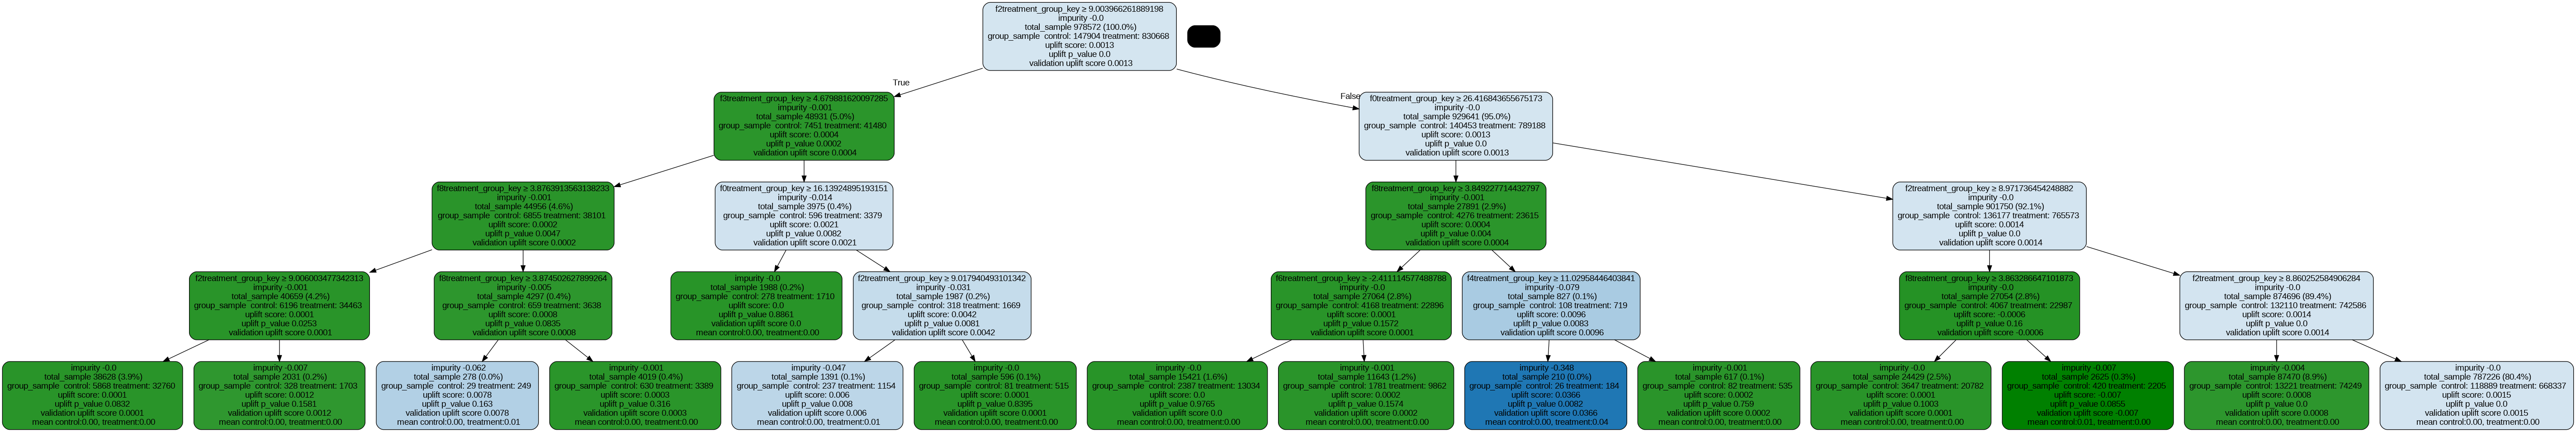

In [ ]:
# Plot uplift tree
from IPython.display import Image
graph = uplift_tree_plot(uplift_tree.fitted_uplift_tree, X_train.columns)
Image(graph.create_png())

In [ ]:
# Plotting the feature importance of the uplift tree
pd.Series(uplift_tree.feature_importances_, index = X_train.columns).sort_values()

,0
f1,0.000000
f5,0.000000
f7,0.000000
f9,0.000000
f10,0.000000
f11,0.000000
f6,0.003522
f4,0.015639
f3,0.043672
f0,0.067152


<Axes: >

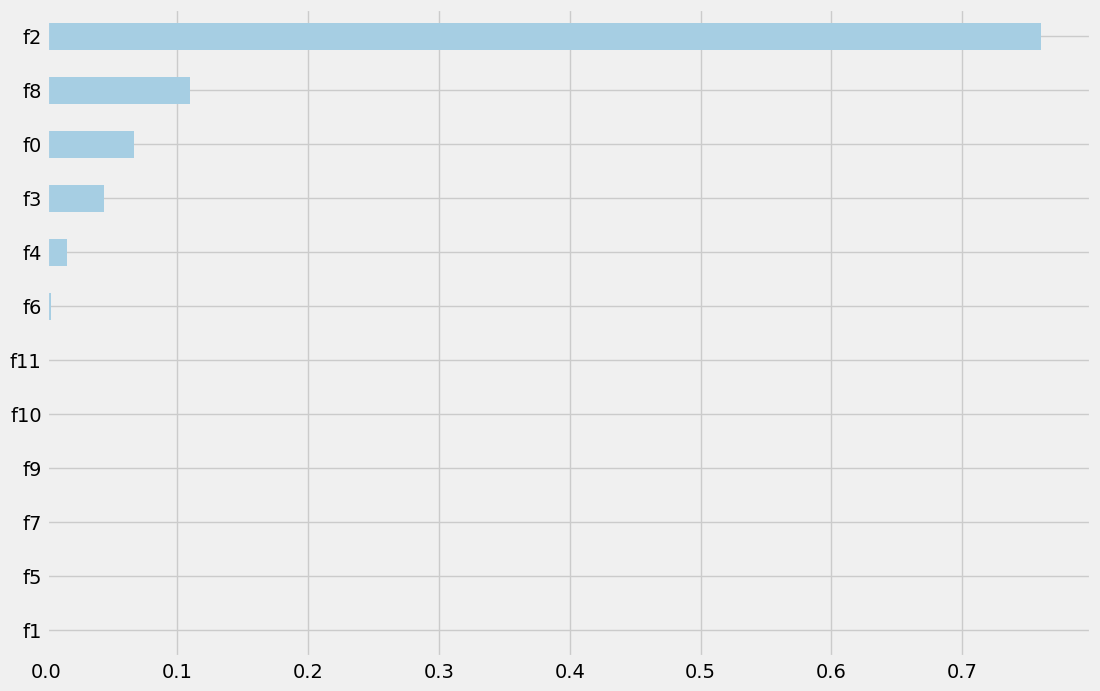

In [ ]:
# Plotting the feature importance of the uplift tree
pd.Series(uplift_tree.feature_importances_, index = X_train.columns).sort_values().plot(kind='barh', figsize=(12,8))

-  is_treated, conversion, uplift 컬럼을 생성
 - Positive uplift 점수: treatment가 효과적임을 보여줌

In [ ]:
uplift_results = pd.DataFrame(y_pred, columns=uplift_rf.classes_[1:])

best_treatment = np.where(uplift_results['treatment'] < 0, 'control', 'treatment')

auuc_metrics = (uplift_results.assign(is_treated=(treatment_test.values != 'control').astype(int),
                              conversion=pd.concat([X_test, y_test, treatment_test], axis=1)['conversion'].values,
                              uplift=uplift_results.max(axis=1))
                .drop(columns=list(uplift_rf.classes_[1:])))

# Print AUUC metrics DataFrame
print("AUUC metrics DataFrame:")
display(auuc_metrics)

AUUC metrics DataFrame:


,is_treated,conversion,uplift
0,1,0,0.001225
1,1,0,0.000337
2,1,0,0.000799
3,0,0,0.000721
4,0,0,0.000977
...,...,...,...
419383,1,0,0.000172
419384,1,0,0.000762
419385,1,0,0.000427
419386,1,0,-0.000518


- Uplift Curve: Total Cumulative Gain
 - treatment로 얼마나 효과적으로 컨버전되었는지를 보여줌
 - 하늘색 곡선: 업리프트 모델링 결과, 파란선: 랜덤한 결과
 - 예: 전체의 20%에 타겟팅한 결과는 모두에 대해 타겟팅한 결과의 80%수준
 - 두 선 사이 영역: AUUC, Area Under the Uplift Curve score.

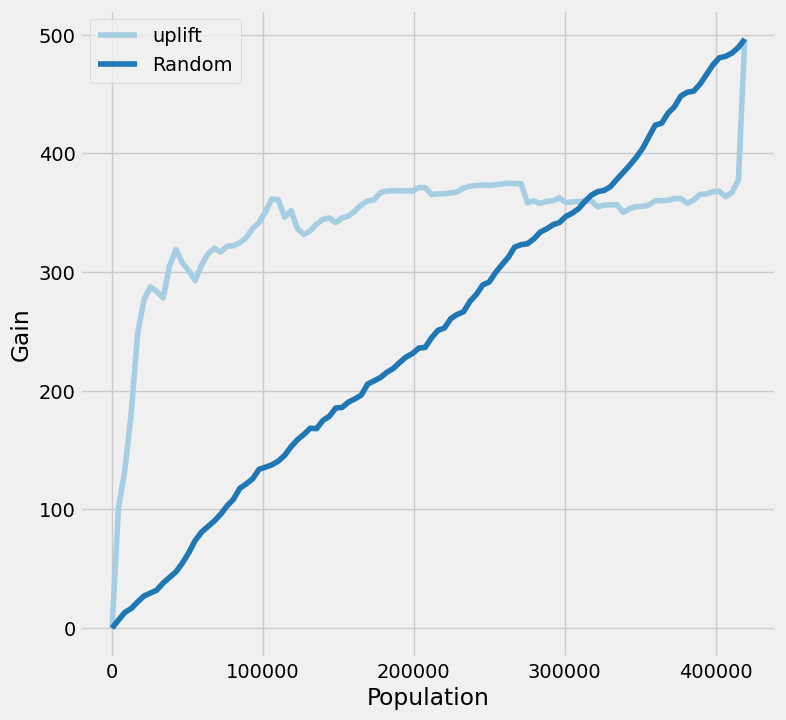

In [ ]:
# Plot the uplift curve (AUUC: area under uplift curve)
plot_gain(auuc_metrics, outcome_col='conversion', treatment_col='is_treated')

In [ ]:
from causalml.metrics import auuc_score
score = auuc_score(auuc_metrics, outcome_col='conversion', treatment_col='is_treated')
print(score)

uplift    0.688004
Random    0.499950
dtype: float64


- Targeted Users 추출: 업리프트 점수에 의해 타겟팅할 대상 추출

In [ ]:
# Sort the uplift_results DataFrame by 'uplift' in descending order
uplift_results['user_id'] = X_test.index
uplift_results.rename(columns={'treatment': 'uplift'}, inplace=True)
uplift_results_sorted = uplift_results.sort_values(by='uplift', ascending=False).reset_index(drop=True)

# Print the customer list
print("Customer List Sorted by Uplift:")
display(uplift_results_sorted[['user_id', 'uplift']].head(10))

Customer List Sorted by Uplift:


,user_id,uplift
0,142684,0.030889
1,38614,0.030889
2,257909,0.027040
3,1108430,0.026718
4,1301189,0.026718
5,502250,0.026718
6,720629,0.026718
7,246997,0.026484
8,923730,0.024728
9,1090125,0.024424


### Meta-Learner 활용

- 두 그룹에 대한 컨버전 비율 비교
 - Treatment Group: 0.31%  (광고 본 사람 중 구매한 비율)
 - Control Group: 0.19% (광고 안 본 사람 중 구매한 비율)
 - 두 비율의 차이를 통해서 광고의 효과를 측정? 디지털 광고의 타겟팅의 특성 상 정확하지 않을 수 있음

In [ ]:
# Conversion and conversion rate by treatment group
treatment_group = df[df['treatment'] == 'treatment']
control_group = df[df['treatment'] == 'control']

# Number of users and conversion rate in treatment group
treatment_converted = treatment_group['conversion'].sum()
treatment_total = len(treatment_group)
treatment_conversion_rate = treatment_converted / treatment_total

# Number of users and conversion rate in control group
control_converted = control_group['conversion'].sum()
control_total = len(control_group)
control_conversion_rate = control_converted / control_total

# Create a summary table
summary_table = pd.DataFrame({
    '': ['Total Users', 'Converted Users', 'Conversion Rate (%)'],
    'Treatment Group': [treatment_total, treatment_converted, f"{treatment_conversion_rate * 100:.2f}%"],
    'Control Group': [control_total, control_converted, f"{control_conversion_rate * 100:.2f}%"]
})
display(summary_table)

# Difference in conversion rate
conversion_rate_difference = treatment_conversion_rate - control_conversion_rate
conversion_rate_difference

,,Treatment Group,Control Group
0,Total Users,1188267,209693
1,Converted Users,3671,406
2,Conversion Rate (%),0.31%,0.19%


0.0011532091908422353

- Calculating ATE with Meta Learners
 - meta learner 방식:CausalML의 XGBT regressor 활용
 - Average Treatment Effect (ATE)
 - 추정된 ATE: 0.10% ( 0.12% 보다 낮음), 광고와 상관없이 구매한 고객들에 의한 차이

In [ ]:
from causalml.inference.meta import XGBTRegressor

# Initialize and fit the T-Learner with XGBoost
learner_t = XGBTRegressor()
learner_t.fit(X=X.values, treatment=treatment.values, y=y.values)

# Predict the treatment effect and calculate the Average Treatment Effect (ATE)
treatment_effect = learner_t.predict(X=X.values)
ate = treatment_effect.mean()

# Output the estimated ATE as a percentage
print(f"Estimated ATE: {ate * 100:.2f}%")

Estimated ATE: 0.09%


- 관측된 Conversion Rates의 분해
 - 위의 차이에 대해 설명
 - 단순 컨버전비율은 ATE와 selection bias로 구분

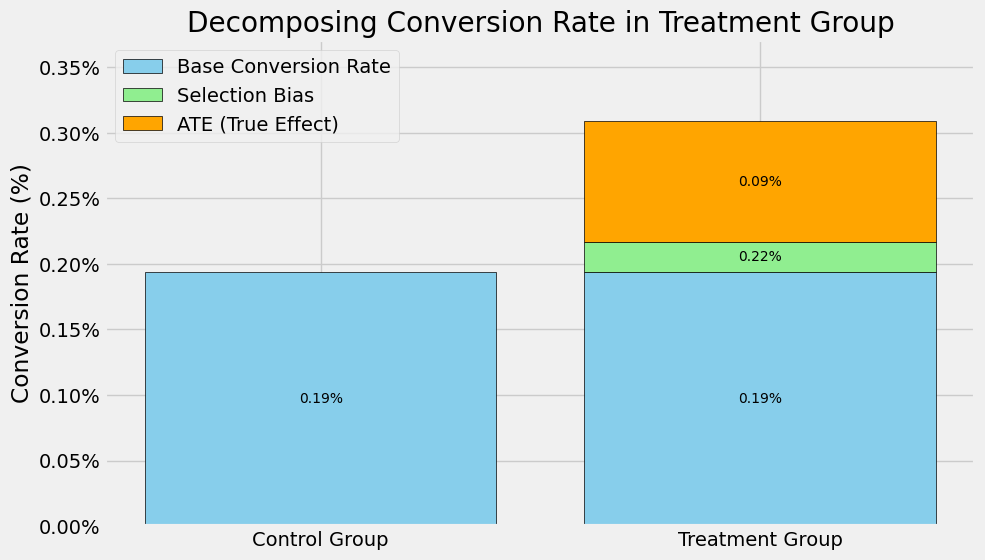

In [ ]:
selection_bias = treatment_conversion_rate - ate

# Plotting the results
fig, ax = plt.subplots(figsize=(10, 6))

# Stacked bars for Treatment Group
base_conversion = control_conversion_rate
selection_bias_height = selection_bias - control_conversion_rate
ate_height = ate

# Create the bar plot
ax.bar('Control Group', control_conversion_rate, color='skyblue', edgecolor='black', label='Base Conversion Rate')
ax.bar('Treatment Group', base_conversion, color='skyblue', edgecolor='black')  # No label to avoid duplication
ax.bar('Treatment Group', selection_bias_height, bottom=base_conversion, color='lightgreen', edgecolor='black', label='Selection Bias')
ax.bar('Treatment Group', ate_height, bottom=base_conversion + selection_bias_height, color='orange', edgecolor='black', label='ATE (True Effect)')

# Adding text labels for each segment
ax.text(0, control_conversion_rate / 2, f'{control_conversion_rate * 100:.2f}%', ha='center', va='center', color='black', fontsize=10)
ax.text(1, base_conversion / 2, f'{base_conversion * 100:.2f}%', ha='center', va='center', color='black', fontsize=10)
ax.text(1, base_conversion + selection_bias_height / 2, f'{selection_bias * 100:.2f}%', ha='center', va='center', color='black', fontsize=10)
ax.text(1, base_conversion + selection_bias_height + ate_height / 2, f'{ate * 100:.2f}%', ha='center', va='center', color='black', fontsize=10)

# Customizing plot
ax.set_ylim(0, treatment_conversion_rate * 1.2)
ax.set_ylabel('Conversion Rate (%)')
ax.set_title('Decomposing Conversion Rate in Treatment Group')

# Adding legend
ax.legend()

# Format y-axis to show percentage
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.2f}%'.format(y * 100)))

plt.show()